## Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following questions.   

##### Note -
1. Write code comments wherever required for code understanding    

Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD                     

Insights to be drawn -                                                                                     
● Get all the cars and their types that do not qualify for clean alternative fuel vehicle.                        
● Get all TESLA cars with the model year, and model type made in Bothell City.                                            
● Get all the cars that have an electric range of more than 100, and were made after 2015.                       
● Draw plots to show the distribution between city and electric vehicle type.                            

Cars and their types that do not qualify for clean alternative fuel vehicle:
Empty DataFrame
Columns: [Make, Electric Vehicle Type]
Index: [] 

No data available for cars that do not qualify for clean alternative fuel vehicle.
TESLA cars with the model year and model type made in Bothell City:
Empty DataFrame
Columns: [Model Year, Model]
Index: [] 

No data available for TESLA cars in Bothell City. 

Cars that have an electric range of more than 100 and were made after 2015:
        VIN (1-10)    County           City State  Postal Code  Model Year  \
0       5YJXCAE26J    Yakima         Yakima    WA      98908.0        2018   
2       5YJ3E1EB0K      King        Seattle    WA      98199.0        2019   
4       5YJSA1E21H  Thurston          Lacey    WA      98516.0        2017   
12      5YJ3E1EC7L  Thurston          Lacey    WA      98503.0        2020   
13      5YJ3E1EB2L  Thurston        Olympia    WA      98516.0        2020   
...            ...       ...            ...   ...   

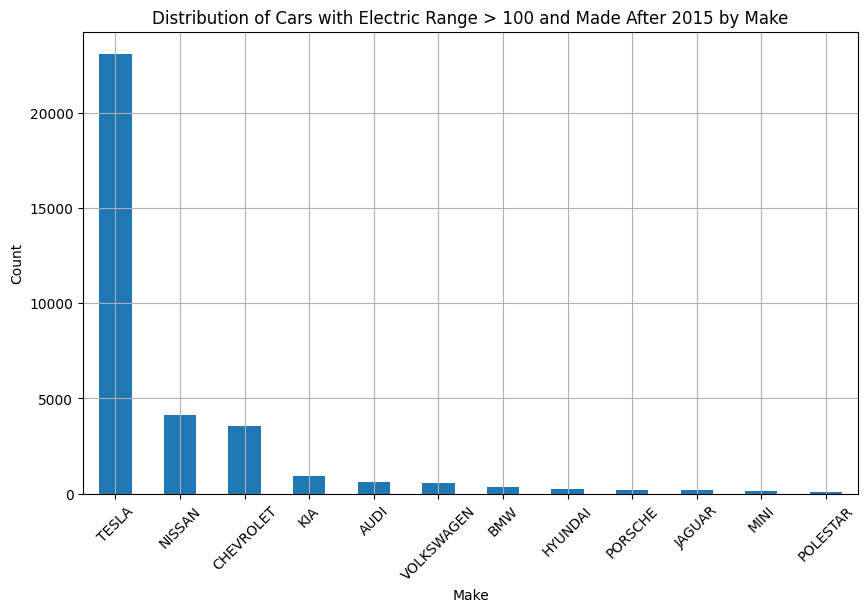

<Figure size 2000x800 with 0 Axes>

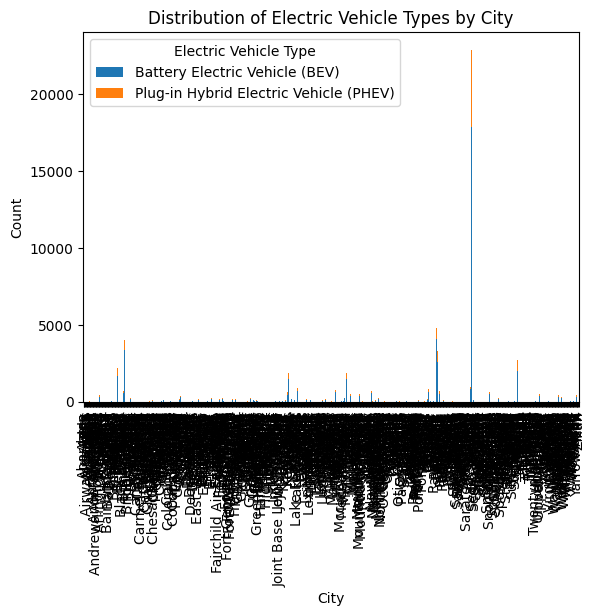

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the provided link
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
non_clean_cars = df.loc[df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == "N", ["Make", "Electric Vehicle Type"]]
print("Cars and their types that do not qualify for clean alternative fuel vehicle:")
print(non_clean_cars, '\n')

# Plot the distribution of cars that do not qualify for clean alternative fuel vehicle by vehicle type
# Check if there is data available for non-clean cars
if not non_clean_cars.empty:
    # Plot the distribution of cars that do not qualify for clean alternative fuel vehicle by vehicle type
    plt.figure(figsize=(10, 6))
    non_clean_vehicle_counts = non_clean_cars["Vehicle Type"].value_counts()
    non_clean_vehicle_counts.plot(kind="bar")
    plt.xlabel("Vehicle Type")
    plt.ylabel("Count")
    plt.title("Cars that Do Not Qualify for Clean Alternative Fuel Vehicle by Vehicle Type")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
else:
    print("No data available for cars that do not qualify for clean alternative fuel vehicle.")

# Get all TESLA cars with the model year, and model type made in Bothell City
tesla_cars_bothell = df.loc[(df["Make"] == "TESLA") & (df["City"] == "BOTHELL"), ["Model Year", "Model"]]
print("TESLA cars with the model year and model type made in Bothell City:")
print(tesla_cars_bothell, '\n')

# Plot the TESLA cars with the model year and model type made in Bothell City
# Check if there is data available for TESLA cars in Bothell City
if not tesla_cars_bothell.empty:
    # Plot the distribution of TESLA cars with the model year and model type made in Bothell City
    plt.figure(figsize=(10, 6))
    tesla_cars_bothell_counts = tesla_cars_bothell["Model Type"].value_counts()
    tesla_cars_bothell_counts.plot(kind="bar")
    plt.xlabel("Model Type")
    plt.ylabel("Count")
    plt.title("TESLA Cars with Model Year and Model Type Made in Bothell City")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
else:
    print("No data available for TESLA cars in Bothell City.",'\n')

# Get all the cars that have an electric range of more than 100 and were made after 2015
electric_cars_range_100_plus = df.loc[(df["Electric Range"] > 100) & (df["Model Year"] > 2015)]
print("Cars that have an electric range of more than 100 and were made after 2015:")
print(electric_cars_range_100_plus)

# Plot the distribution of cars with an electric range > 100 and made after 2015 by make
plt.figure(figsize=(10, 6))
electric_cars_range_100_plus_make_counts = electric_cars_range_100_plus["Make"].value_counts()
electric_cars_range_100_plus_make_counts.plot(kind="bar")
plt.xlabel("Make")
plt.ylabel("Count")
plt.title("Distribution of Cars with Electric Range > 100 and Made After 2015 by Make")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Draw plots to show the distribution between city and electric vehicle type
plt.figure(figsize=(20, 8))
df_city_ev_type = df.groupby(["City", "Electric Vehicle Type"]).size().unstack(fill_value=0)
df_city_ev_type.plot(kind="bar", stacked=True)
plt.xlabel("City")
plt.ylabel("Count")
plt.title("Distribution of Electric Vehicle Types by City")
plt.legend(title="Electric Vehicle Type")
plt.show()